<a href="https://colab.research.google.com/github/Ellisetr/Intelligent-Systems-and-Technologies/blob/main/%D0%98%D0%A1%D0%A2_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная 3-4
Выполнить визуализацию в двухмерном пространстве набора данных,
указанного в таблице 1, используя алгоритмы нелинейного снижения
размерности:
*   t-sne (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) и
*   UMAP (https://umap-learn.readthedocs.io/en/latest/),


для которых имеются программные реализации в Python.
При работе с набором данных реализовать различные варианты
масштабирования:
*   MinMax
(https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler),
*   Standard
(https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler),
*   Robust
(https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robust#sklearn.preprocessing.RobustScaler).
*   Выполнить сравнительный анализ результатов масштабирования
(https://scikitlearn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-autoexamples-preprocessing-plot-all-scaling-py,
https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscalertechniques-ml/).

Разбиение на обучающую и тестовую выборку не проводить.

In [ ]:
%pip install umap-learn
%pip install sklearn

from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 44.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1e51aaa69d2c160cddb855b144af81dae52d11a486a6732c9f19e6ec98399bc7
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=15974f201586a1c9d748625a051be580155c716179bce56be4b27a2916e9cdd6
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=cb7ad875f6a648e3205eaffd89

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', sep=',', names=['age','year_of_operation','positive_axillary_nodes_detected', 'survival_status'], engine='python')
df

,age,year_of_operation,positive_axillary_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


График ненормализованных критериев

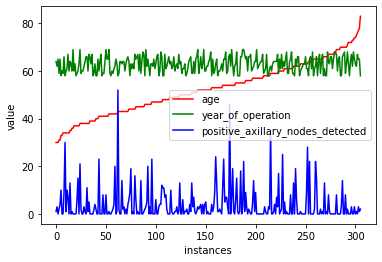

In [ ]:
x_axis = np.array(range(df.shape[0]))
a = np.array(df['age'])
b = np.array(df['year_of_operation'])
c = np.array(df['positive_axillary_nodes_detected'])

plt.plot(x_axis, a, color='r', label='age')
plt.plot(x_axis, b, color='g', label='year_of_operation')
plt.plot(x_axis, c, color='b', label='positive_axillary_nodes_detected')

plt.xlabel('instances')
plt.ylabel('value')

plt.legend()

plt.show()

In [ ]:
five_years_survived = np.array([1 if i == 1 else 0 for i in df['survival_status']])
df['survival_status'] = five_years_survived
df

,age,year_of_operation,positive_axillary_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,0


На выживаемость пациента в течение 5 лет влияют 3 фактора, следовательно, нужно масштабировать только их, а качественный критерий оставить

In [ ]:
rows = df.to_numpy()
factors_df = df[['age','year_of_operation','positive_axillary_nodes_detected']]
factors_df

,age,year_of_operation,positive_axillary_nodes_detected
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


MinMax

In [ ]:
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(factors_df)
x_minmax[:10]

array([[0.        , 0.54545455, 0.01923077],
       [0.        , 0.36363636, 0.05769231],
       [0.        , 0.63636364, 0.        ],
       [0.01886792, 0.09090909, 0.03846154],
       [0.01886792, 0.63636364, 0.07692308],
       [0.05660377, 0.        , 0.19230769],
       [0.05660377, 0.18181818, 0.        ],
       [0.0754717 , 0.09090909, 0.        ],
       [0.0754717 , 0.72727273, 0.17307692],
       [0.0754717 , 0.        , 0.57692308]])

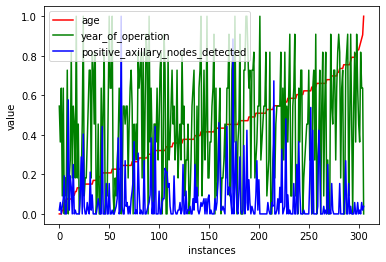

In [ ]:
a = np.array([r[0] for r in x_minmax])
b = np.array([r[1] for r in x_minmax])
c = np.array([r[2] for r in x_minmax])

plt.plot(x_axis, a, color='r', label='age')
plt.plot(x_axis, b, color='g', label='year_of_operation')
plt.plot(x_axis, c, color='b', label='positive_axillary_nodes_detected')

plt.xlabel('instances')
plt.ylabel('value')

plt.legend()

plt.show()

Standard

In [ ]:
scaler = StandardScaler().fit(factors_df.to_numpy())
x_standard = scaler.transform(factors_df.to_numpy())
x_standard[:10]

array([[-2.08214014,  0.35358406, -0.42159203],
       [-2.08214014, -0.26292148, -0.14295885],
       [-2.08214014,  0.66183684, -0.56090862],
       [-1.98942552, -1.18767981, -0.28227544],
       [-1.98942552,  0.66183684, -0.00364226],
       [-1.80399628, -1.49593258,  0.83225727],
       [-1.80399628, -0.87942703, -0.56090862],
       [-1.71128165, -1.18767981, -0.56090862],
       [-1.71128165,  0.97008961,  0.69294068],
       [-1.71128165, -1.49593258,  3.61858905]])

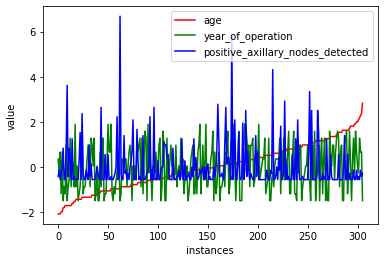

In [ ]:
a = np.array([r[0] for r in x_standard])
b = np.array([r[1] for r in x_standard])
c = np.array([r[2] for r in x_standard])

plt.plot(x_axis, a, color='r', label='age')
plt.plot(x_axis, b, color='g', label='year_of_operation')
plt.plot(x_axis, c, color='b', label='positive_axillary_nodes_detected')

plt.xlabel('instances')
plt.ylabel('value')

plt.legend()

plt.show()

RobustScaler

In [ ]:
transformer = RobustScaler().fit(factors_df.to_numpy())
x_robust = transformer.transform(factors_df.to_numpy())
x_robust[:10]

array([[-1.31343284,  0.17391304,  0.        ],
       [-1.31343284, -0.17391304,  0.5       ],
       [-1.31343284,  0.34782609, -0.25      ],
       [-1.25373134, -0.69565217,  0.25      ],
       [-1.25373134,  0.34782609,  0.75      ],
       [-1.13432836, -0.86956522,  2.25      ],
       [-1.13432836, -0.52173913, -0.25      ],
       [-1.07462687, -0.69565217, -0.25      ],
       [-1.07462687,  0.52173913,  2.        ],
       [-1.07462687, -0.86956522,  7.25      ]])

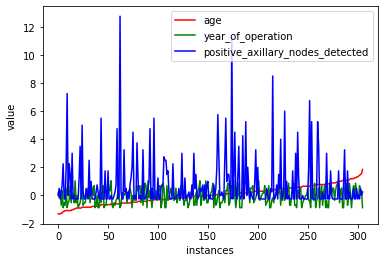

In [ ]:
a = np.array([r[0] for r in x_robust])
b = np.array([r[1] for r in x_robust])
c = np.array([r[2] for r in x_robust])

plt.plot(x_axis, a, color='r', label='age')
plt.plot(x_axis, b, color='g', label='year_of_operation')
plt.plot(x_axis, c, color='b', label='positive_axillary_nodes_detected')

plt.xlabel('instances')
plt.ylabel('value')

plt.legend()

plt.show()

TSNE

In [ ]:
def tsne(dataset):
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(dataset)
    return X_embedded

In [ ]:
def build_graph(axis,value):
    
    col = []
    x = []
    y = []
    for i in range(0,len(value)):
        if value[i] == 1:
            col.append('green')
        else:
            col.append('red')
    for i in range(len(axis)):
        x.append(axis[i][0])
        y.append(axis[i][1])
    for i in range(len(x)):
        plt.scatter(x[i], y[i], c = col[i], s = 10,
                linewidth = 0)
    
    plt.show()

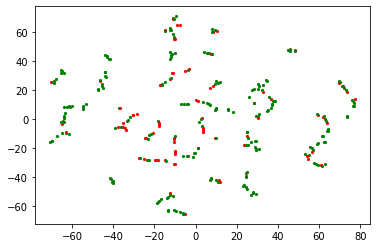

In [ ]:
value = df['survival_status'].tolist()
axis = tsne(factors_df.to_numpy())
build_graph(axis,value)

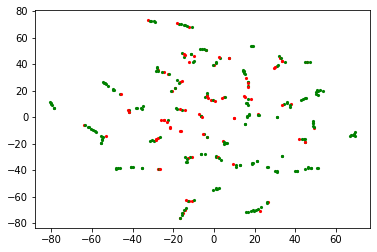

In [ ]:
axis = tsne(x_minmax)
build_graph(axis,value)

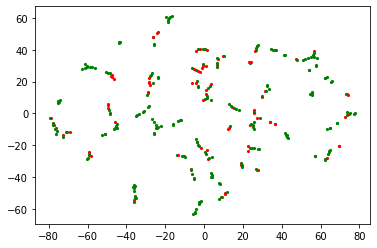

In [ ]:
axis = tsne(x_standard)
build_graph(axis, value)

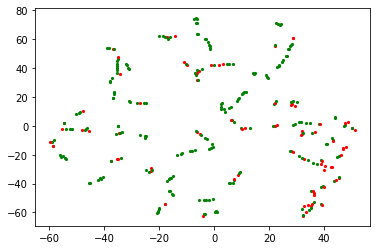

In [ ]:
axis = tsne(x_robust)
build_graph(axis, value)

UMAP

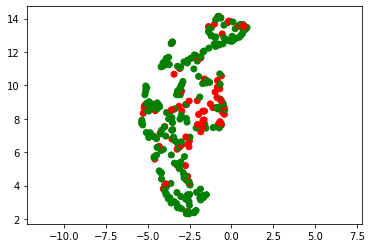

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(factors_df.to_numpy())

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = ['green' if value[i] == 1 else 'red' for i in range(len(value))]
)
plt.gca().set_aspect('equal', 'datalim')

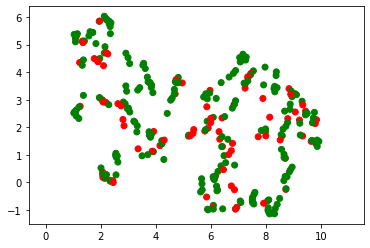

In [ ]:
embedding = reducer.fit_transform(x_minmax)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = ['green' if value[i] == 1 else 'red' for i in range(len(value))]
)
plt.gca().set_aspect('equal', 'datalim')

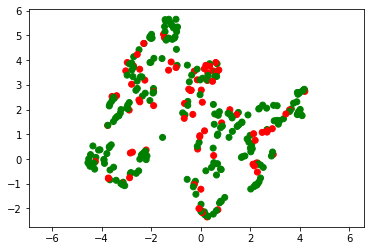

In [ ]:
embedding = reducer.fit_transform(x_standard)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = ['green' if value[i] == 1 else 'red' for i in range(len(value))]
)
plt.gca().set_aspect('equal', 'datalim')

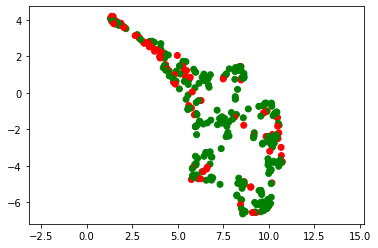

In [ ]:
embedding = reducer.fit_transform(x_robust)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = ['green' if value[i] == 1 else 'red' for i in range(len(value))]
)
plt.gca().set_aspect('equal', 'datalim')